# Basic flow of text classification

## Check available datasets on the Hub

In [1]:
from datasets import list_datasets

# get all available datasets at hugging face hub
all_datasets = list_datasets()
print("#Datasets: ", len(all_datasets))
print("First 5 datasets: ", all_datasets[:5])

/Users/haruki-n/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/haruki-n/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/73/7dn020555nz1mz020_4qn2_00000gn/T/ipykernel_18229/2439458847.py:4: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


#Datasets:  54060
First 5 datasets:  ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus']


## load dataset

In [2]:
from datasets import load_dataset

emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds, valid_ds, test_ds = emotions["train"], emotions["validation"], emotions["test"]

# get some examples
train_ds[:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [7]:
# get names of column
print(train_ds.column_names)

print(train_ds.features)

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [8]:
# dataset を特定のデータ形式に変換
emotions.set_format(type="pandas")
df_train = emotions["train"][:]

df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label2str(row):
    return emotions["train"].features["label"].int2str(row)


df_train["label_name"] = df_train["label"].apply(label2str)

df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Check data distribution

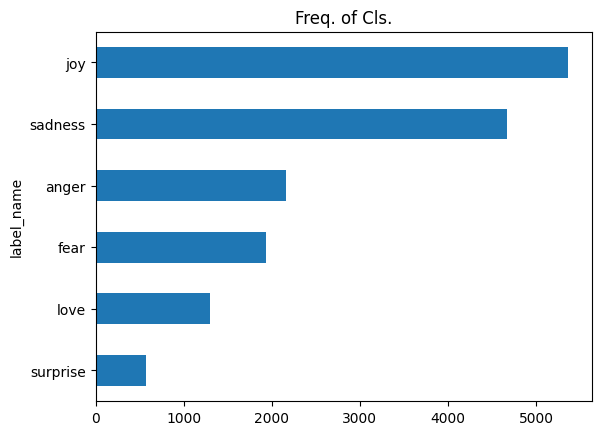

In [14]:
import matplotlib.pyplot as plt

df_train["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Freq. of Cls.")
plt.show()
%matplotlib inline

> 不均衡データの扱い
> - minor class をランダムにオーバーサンプル
> - major class をランダムにアンダーサンプル
> - などなど

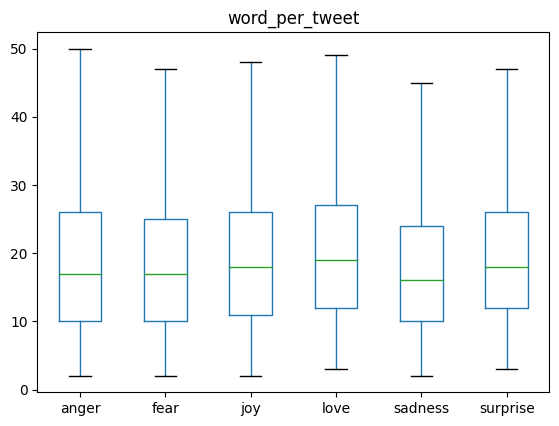

In [16]:
# words per tweet distribution
df_train["word_per_tweet"] = df_train["text"].str.split().apply(len)
df_train.boxplot("word_per_tweet", by="label_name", grid=False, showfliers=False)

plt.suptitle("")
plt.xlabel("")
plt.show()

In [17]:
# データ分析が終わったら、データセットの出力形式を元に戻しておくべし（後段の処理のため）
emotions.reset_format()